In [ ]:
!pip install rdkit
!pip install git+https://github.com/bp-kelley/descriptastorus


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Project_Msc/Project_3/L_donovani_2class_bioactivityData.csv')

In [ ]:
df

,Smiles,class,pIC50
0,O=C(O)COCCN1CCN(C(c2ccccc2)c2ccc(Cl)cc2)CC1,0,4.151626
1,CCCC[C@H]1C(=O)O[C@@H]2O[C@@]3(CC)CC[C@H]4[C@H...,0,4.443697
2,C[C@@H]1CC[C@H]2[C@@H](C)C(=O)O[C@@H]3OC(C)(C)...,0,3.800519
3,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,1,5.651695
4,Nc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1,0,3.394986
...,...,...,...
5700,Cc1cn([C@H]2C=C[C@@H](CO)O2)c(=O)[nH]c1=O,0,3.350665
5701,C[C@@H]1CC[C@H]2CC(=O)O[C@@H]3O[C@@]4(CCc5cccc...,0,4.886057
5702,c1ccc(-c2ccc(CC3CN4CCC3CC4)cc2)cc1,0,3.966576
5703,C[C@@H]1CC[C@H]2CC(=O)O[C@@H]3O[C@@]4(CCCc5ccc...,0,4.958607


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
# create a function to calculate all RDKit descriptors for a SMILES string
def get_2D_descriptors(smile):
        desc_names=[]
        for i in Descriptors._descList:
           desc_names.append(i)
        mol = Chem.MolFromSmiles(smile)
        desc_list = []
        for desc, func in Descriptors.descList:
            desc_list.append(func(mol))
        return desc_list


def get_ecfp(smile, radius=2, n_bits=2048):
    """
    Generates ECFP fingerprint for a list of SMILES
    
    Parameters:
    smiles_list (list): list of SMILES strings
    radius (int): radius of the circular fingerprints
    n_bits (int): number of bits in the fingerprint
    
    Returns:
    numpy array: ECFP fingerprints for the input SMILES
    """
    mol = Chem.MolFromSmiles(smile) # convert SMILES to RDKit molecule
    ecfp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=n_bits) # generate ECFP fingerprint
    return ecfp


def get_fcfp(smile, radius=2, n_bits=2048):
    """
    Generates ECFP fingerprint for a list of SMILES
    
    Parameters:
    smiles_list (list): list of SMILES strings
    radius (int): radius of the circular fingerprints
    n_bits (int): number of bits in the fingerprint
    
    Returns:
    numpy array: ECFP fingerprint for the input SMILE
    """
    mols = Chem.MolFromSmiles(smile)
    fcfp = AllChem.GetMorganFingerprintAsBitVect(mols, radius, nBits=n_bits ,useFeatures=True)
    return fcfp





In [ ]:
ecfp_list = []
fcfp_list = []
descriptors_list = []
for smiles in df['Smiles']:
    ecfp = get_ecfp(smiles,radius=3)
    fcfp = get_fcfp(smiles,radius=3)
    descriptor=get_2D_descriptors(smiles)
    ecfp_list.append(ecfp)
    fcfp_list.append(fcfp)
    descriptors_list.append(descriptor)

In [ ]:
import numpy as np
ecfp_l=np.asarray(ecfp_list)


In [ ]:
fcfp_l=np.asarray(fcfp_list)

In [ ]:
fcfp_l.shape

(5705, 2048)

In [ ]:
descriptors_l=np.asarray(descriptors_list)

In [ ]:
descriptors_l.shape

(5691, 208)

In [ ]:
desc_names=[]
for i in Descriptors.descList:
    desc_names.append(i[0])
desc_names

In [ ]:
desc_names

In [ ]:
ecfp_2d_desc = pd.concat([pd.DataFrame(ecfp_l),pd.DataFrame(descriptors_l,columns=desc_names)],axis=1)

In [ ]:
fcfp_2d_desc = pd.concat([pd.DataFrame(fcfp_l),pd.DataFrame(descriptors_l,columns=desc_names)],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(descriptors_l)
descriptors_l_normalized = scaler.transform(descriptors_l)


In [ ]:
fcfp_2d_desc_normalized= pd.concat([pd.DataFrame(fcfp_l),pd.DataFrame(descriptors_l_normalized,columns=desc_names)],axis=1)

In [ ]:
ecfp_2d_desc_normalized= pd.concat([pd.DataFrame(ecfp_l),pd.DataFrame(descriptors_l_normalized,columns=desc_names)],axis=1)
ecfp_2d_desc_normalized.columns = ecfp_2d_desc_normalized.columns.astype(str)
# ecfp_2d_desc_normalized

In [ ]:
ecfp_2d_desc_normalized.to_csv('/content/drive/MyDrive/Project_Msc/Project_3/Trained_models/L_donovani_ecfp_2d_desc.csv')

In [ ]:
fcfp_2d_desc_normalized 
fcfp_2d_desc_normalized.columns = fcfp_2d_desc_normalized.columns.astype(str)
'''TypeError: Feature names are only supported if all input features have string names,
 but your input has ['int', 'str'] as feature name / column name types.
  If you want feature names to be stored and validated, you must convert them all to strings, 
  by using X.columns = X.columns.astype(str) for example. 
Otherwise you can remove feature / column names from your input data,
 or convert them all to a non-string data type.'''

In [ ]:
x=pd.concat([df['Smiles'],df['class'],pd.DataFrame(ecfp_2d_desc_normalized,columns=desc_names)],axis=1)
x.to_csv('/content/drive/MyDrive/Project_Msc/Project_3/L_donovani_ecfp_2d_desc.csv')

In [ ]:
x

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

# **My dataset**
ecfp_l = ecfp fingerprints standalone

fcfp_l = fcfp fingerprints standalone

descriptors_l = rdkit 2d  descriptor standalone

ecfp_2d_desc = ecfp + descriptors

fcfp_2d_desc = fcfp + descriptors

descriptors_l_normalized = descriptors normalized by Z-score normalization

fcfp_2d_desc_normalized = fcfp + descriptors normalized by Z-score normalization

ecfp_2d_desc_normalized = ecfp + descriptors normalized by Z-score normalization



# Random Forest

**ECFP Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ecfp_l, df['class'], test_size=0.2, random_state=42)

# initialize the random forest classifier with default hyperparameters
rfc_ecfp = RandomForestClassifier()

# fit the model on the training data

# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(rfc_ecfp, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
rfc_ecfp.fit(X_train, y_train)

# make predictions on the test data
y_pred = rfc_ecfp.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

accuracy: [0.79846659 0.78751369 0.79189485 0.79518072 0.79276316]
Mean accuracy: 0.793163803539517
Standard deviation: 0.0036299330974214595
Model_Accuracy: 0.7905346187554777
f1_score: 0.7347391786903442
precison_score: 0.801452784503632
recall_score: 0.6782786885245902
roc_auc_score: 0.7763522079682675
classification_report:               precision    recall  f1-score   support

           0       0.78      0.87      0.83       653
           1       0.80      0.68      0.73       488

    accuracy                           0.79      1141
   macro avg       0.79      0.78      0.78      1141
weighted avg       0.79      0.79      0.79      1141

confusion_matrix: [[571  82]
 [157 331]]


In [ ]:
import pickle
# Dump the model as a pickle file
with open('/content/drive/MyDrive/Project_Msc/Project_3/Trained_models/rfc_ecfp.pkl', 'wb') as f:
    pickle.dump(rfc_ecfp, f)

accuracy: [0.79518072 0.79408543 0.77765608 0.79189485 0.79057018]

Mean accuracy: 0.7898774523933053
Standard deviation: 0.006320498614643145

Model_Accuracy: 0.7905346187554777

f1_score: 0.7305524239007892

precison_score: 0.8120300751879699

recall_score: 0.6639344262295082

roc_auc_score: 0.774539954309241

**FCFP Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fcfp_l, df['class'], test_size=0.2, random_state=42)

# initialize the random forest classifier with default hyperparameters
rfc_fcfp = RandomForestClassifier()

# fit the model on the training data

# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(rfc_fcfp, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
rfc_fcfp.fit(X_train, y_train)

# make predictions on the test data
y_pred = rfc_fcfp.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

accuracy: [0.80175246 0.79079956 0.7973713  0.78313253 0.78399123]
Mean accuracy: 0.7914094175746046
Standard deviation: 0.007299740072787293
Model_Accuracy: 0.7914110429447853
f1_score: 0.734966592427617
precison_score: 0.8048780487804879
recall_score: 0.6762295081967213
roc_auc_score: 0.7768590113724801


In [ ]:
import pickle
# Dump the model as a pickle file
with open('/content/drive/MyDrive/Project_Msc/Project_3/Trained_models/rfc_fcfp.pkl', 'wb') as f:
    pickle.dump(rfc_fcfp, f)

accuracy: [0.80175246 0.79079956 0.7973713  0.78313253 0.78399123]

Mean accuracy: 0.7914094175746046

Standard deviation: 0.007299740072787293

Model_Accuracy: 0.7914110429447853

f1_score: 0.734966592427617

precison_score: 0.8048780487804879

recall_score: 0.6762295081967213

roc_auc_score: 0.7768590113724801

**Descriptors Normalized**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(descriptors_l_normalized, df['class'], test_size=0.2, random_state=42)

# initialize the random forest classifier with default hyperparameters
rfc_desc_norm = RandomForestClassifier()

# fit the model on the training data

# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(rfc_desc_norm, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
rfc_desc_norm.fit(X_train, y_train)

# make predictions on the test data
y_pred = rfc_desc_norm.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

accuracy: [0.79189485 0.78751369 0.78094195 0.81051479 0.79605263]
Mean accuracy: 0.7933835821755924
Standard deviation: 0.009920364330994441
Model_Accuracy: 0.7879053461875548
f1_score: 0.7317073170731707
precison_score: 0.7971014492753623
recall_score: 0.6762295081967213
roc_auc_score: 0.7737962242361861


In [ ]:
import pickle
# Dump the model as a pickle file
with open('/content/drive/MyDrive/Project_Msc/Project_3/Trained_models/rfc_desc_norm.pkl', 'wb') as f:
    pickle.dump(rfc_desc_norm, f)

accuracy: [0.79189485 0.78751369 0.78094195 0.81051479 0.79605263]

Mean accuracy: 0.7933835821755924

Standard deviation: 0.009920364330994441

Model_Accuracy: 0.7879053461875548

f1_score: 0.7317073170731707

precison_score: 0.7971014492753623

recall_score: 0.6762295081967213

roc_auc_score: 0.7737962242361861

**FCFP + 2d descriptors**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fcfp_2d_desc_normalized, df['class'], test_size=0.2, random_state=42)

# initialize the random forest classifier with default hyperparameters
rfc_fcfp_2d_desc = RandomForestClassifier()

# fit the model on the training data

# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(rfc_fcfp_2d_desc, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
rfc_fcfp_2d_desc.fit(X_train, y_train)

# make predictions on the test data
y_pred = rfc_fcfp_2d_desc.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

accuracy: [0.80065717 0.80284775 0.79846659 0.81270537 0.79824561]
Mean accuracy: 0.8025845006821545
Standard deviation: 0.005329144759613402
Model_Accuracy: 0.7992988606485539
f1_score: 0.7469613259668507
precison_score: 0.8105515587529976
recall_score: 0.6926229508196722
roc_auc_score: 0.785821429468029
classification_report:               precision    recall  f1-score   support

           0       0.79      0.88      0.83       653
           1       0.81      0.69      0.75       488

    accuracy                           0.80      1141
   macro avg       0.80      0.79      0.79      1141
weighted avg       0.80      0.80      0.80      1141



In [ ]:
import pickle
# Dump the model as a pickle file
with open('/content/drive/MyDrive/Project_Msc/Project_3/Trained_models/rfc_fcfp_2d_desc.pkl', 'wb') as f:
    pickle.dump(rfc_fcfp_2d_desc, f)

accuracy: [0.80065717 0.80284775 0.79846659 0.81270537 0.79824561]

Mean accuracy: 0.8025845006821545

Standard deviation: 0.005329144759613402

Model_Accuracy: 0.7992988606485539

f1_score: 0.7469613259668507

precison_score: 0.8105515587529976

recall_score: 0.6926229508196722

roc_auc_score: 0.785821429468029

classification_report:               precision    recall  f1-score   support

           0       0.79      0.88      0.83       653
           1       0.81      0.69      0.75       488

    accuracy                           0.80      1141
   macro avg       0.80      0.79      0.79      1141
weighted avg       0.80      0.80      0.80      1141

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ecfp_2d_desc_normalized, df['class'], test_size=0.2, random_state=42)

# initialize the random forest classifier with default hyperparameters
rfc_ecfp_2d_desc = RandomForestClassifier()

# fit the model on the training data

# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(rfc_ecfp_2d_desc, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
rfc_ecfp_2d_desc.fit(X_train, y_train)

# make predictions on the test data
y_pred = rfc_ecfp_2d_desc.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

accuracy: [0.79189485 0.79956188 0.79956188 0.81161008 0.80811404]
Mean accuracy: 0.8021485463384639
Standard deviation: 0.0069803653513057255
Model_Accuracy: 0.8010517090271692
f1_score: 0.7463687150837989
precison_score: 0.8206388206388207
recall_score: 0.6844262295081968
roc_auc_score: 0.7863172495167323
classification_report:               precision    recall  f1-score   support

           0       0.79      0.89      0.84       653
           1       0.82      0.68      0.75       488

    accuracy                           0.80      1141
   macro avg       0.81      0.79      0.79      1141
weighted avg       0.80      0.80      0.80      1141

confusion_matrix: [[580  73]
 [154 334]]


In [ ]:
import pickle
# Dump the model as a pickle file
with open('/content/drive/MyDrive/Project_Msc/Project_3/Trained_models/rfc_ecfp_2d_desc.pkl', 'wb') as f:
    pickle.dump(rfc_ecfp_2d_desc, f)

accuracy: [0.80065717 0.80284775 0.79846659 0.81270537 0.79824561]

Mean accuracy: 0.8025845006821545

Standard deviation: 0.005329144759613402

Model_Accuracy: 0.7992988606485539

f1_score: 0.7469613259668507

precison_score: 0.8105515587529976

recall_score: 0.6926229508196722

roc_auc_score: 0.785821429468029

classification_report:               precision    recall  f1-score   support

           0       0.79      0.88      0.83       653
           1       0.81      0.69      0.75       488

    accuracy                           0.80      1141
    
   macro avg       0.80      0.79      0.79      1141

weighted avg       0.80      0.80      0.80      1141

#SVM

**SVM ECFP**

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ecfp_l, df['class'], test_size=0.2, random_state=42)

# initialize the random forest classifier with default hyperparameters
svm_ecfp = svm.SVC(gamma='auto',kernel='rbf')


# fit the model on the training data

# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(svm_ecfp, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
svm_ecfp.fit(X_train, y_train)

# make predictions on the test data
y_pred = svm_ecfp.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

accuracy: [0.65060241 0.64622125 0.64841183 0.64950712 0.65789474]
Mean accuracy: 0.650527468726581
Standard deviation: 0.003958353970959042
Model_Accuracy: 0.6275197195442594
f1_score: 0.26086956521739124
precison_score: 0.8620689655172413
recall_score: 0.15368852459016394
roc_auc_score: 0.5676559008861999
classification_report:               precision    recall  f1-score   support

           0       0.61      0.98      0.75       653
           1       0.86      0.15      0.26       488

    accuracy                           0.63      1141
   macro avg       0.74      0.57      0.51      1141
weighted avg       0.72      0.63      0.54      1141



accuracy: [0.59912377 0.59912377 0.59912377 0.59912377 0.59868421]

Mean accuracy: 0.5990358563440364

Standard deviation: 0.0001758229088602903

Model_Accuracy: 0.5723049956178791

f1_score: 0.0

precison_score: 0.0

recall_score: 0.0

roc_auc_score: 0.5

classification_report:               precision    recall  f1-score   support

           0       0.57      1.00      0.73       653
           1       0.00      0.00      0.00       488

    accuracy                           0.57      1141
   macro avg       0.29      0.50      0.36      1141
weighted avg       0.33      0.57      0.42      1141

In [ ]:
import pickle
# Dump the model as a pickle file
with open('/content/drive/MyDrive/Project_Msc/Project_3/Trained_models/svm_ecfp.pkl', 'wb') as f:
    pickle.dump(svm_ecfp, f)

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fcfp_l, np.asarray(df['class']), test_size=0.2, random_state=42)

# initialize the random forest classifier with default hyperparameters
svm_fcfp = svm.SVC(gamma='auto',kernel='rbf')


# fit the model on the training data

# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(svm_fcfp, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
svm_fcfp.fit(X_train, y_train)

# make predictions on the test data
y_pred = svm_fcfp.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

KeyboardInterrupt: ignored

accuracy: [0.65279299 0.64841183 0.64731654 0.66046002 0.65899123]

Mean accuracy: 0.6535945216271786

Standard deviation: 0.00535117475025547

Model_Accuracy: 0.635407537248028

f1_score: 0.2752613240418118

precison_score: 0.9186046511627907

recall_score: 0.16188524590163936

roc_auc_score: 0.575582745462305

classification_report:             
                 precision    recall  f1-score   support

           0       0.61      0.99      0.76       653
           1       0.92      0.16      0.28       488

    accuracy                           0.64      1141

   macro avg       0.77      0.58      0.52      1141
   
weighted avg       0.74      0.64      0.55      1141

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(descriptors_l_normalized, np.asarray(df['class']), test_size=0.2, random_state=42)

# initialize the random forest classifier with default hyperparameters
svm_descriptors = svm.SVC(gamma='auto')


# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(svm_descriptors, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
svm_descriptors.fit(X_train, y_train)

# make predictions on the test data
y_pred = svm_descriptors.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

accuracy: [0.6067908  0.61007667 0.60240964 0.61336254 0.60964912]
Mean accuracy: 0.6084577544628273
Standard deviation: 0.003673026639090683
Model_Accuracy: 0.595968448729185
f1_score: 0.11854684512428298
precison_score: 0.8857142857142857
recall_score: 0.06352459016393443
roc_auc_score: 0.5286995079456732
classification_report:               precision    recall  f1-score   support

           0       0.59      0.99      0.74       653
           1       0.89      0.06      0.12       488

    accuracy                           0.60      1141
   macro avg       0.74      0.53      0.43      1141
weighted avg       0.71      0.60      0.47      1141



accuracy: [0.6067908  0.61007667 0.60240964 0.61336254 0.60964912]

Mean accuracy: 0.6084577544628273

Standard deviation: 0.003673026639090683

Model_Accuracy: 0.595968448729185

f1_score: 0.11854684512428298

precison_score: 0.8857142857142857

recall_score: 0.06352459016393443

roc_auc_score: 0.5286995079456732

classification_report:    
                  
                  precision    recall  f1-score   support

           0       0.59      0.99      0.74       653
           1       0.89      0.06      0.12       488

    accuracy                           0.60      1141

   macro avg       0.74      0.53      0.43      1141
   
weighted avg       0.71      0.60      0.47      1141


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(descriptors_l, np.asarray(df['class']), test_size=0.2, random_state=42)

# initialize the random forest classifier with default hyperparameters
svm_descriptors = svm.SVC(gamma='auto')


# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(svm_descriptors, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
svm_descriptors.fit(X_train, y_train)

# make predictions on the test data
y_pred = svm_descriptors.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

accuracy: [0.6067908  0.61007667 0.60240964 0.61336254 0.60964912]
Mean accuracy: 0.6084577544628273
Standard deviation: 0.003673026639090683
Model_Accuracy: 0.595968448729185
f1_score: 0.11854684512428298
precison_score: 0.8857142857142857
recall_score: 0.06352459016393443
roc_auc_score: 0.5286995079456732
classification_report:               precision    recall  f1-score   support

           0       0.59      0.99      0.74       653
           1       0.89      0.06      0.12       488

    accuracy                           0.60      1141
   macro avg       0.74      0.53      0.43      1141
weighted avg       0.71      0.60      0.47      1141

confusion_matrix: [[649   4]
 [457  31]]


accuracy: [0.6067908  0.61007667 0.60240964 0.61336254 0.60964912]

Mean accuracy: 0.6084577544628273

Standard deviation: 0.003673026639090683

Model_Accuracy: 0.595968448729185

f1_score: 0.11854684512428298

precison_score: 0.8857142857142857

recall_score: 0.06352459016393443

roc_auc_score: 0.5286995079456732

classification_report:              
                 precision    recall  f1-score   support

           0       0.59      0.99      0.74       653
           1       0.89      0.06      0.12       488

    accuracy                           0.60      1141
   macro avg       0.74      0.53      0.43      1141

weighted avg       0.71      0.60      0.47      1141

confusion_matrix: [[649   4]

                    [457  31]]

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(descriptors_l_normalized, np.asarray(df['class']), test_size=0.2, random_state=42)

# initialize the random forest classifier with default hyperparameters
svm_desc_norm = svm.SVC(C=10,gamma='auto',kernel='poly')


# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(svm_desc_norm, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
svm_desc_norm.fit(X_train, y_train)

# make predictions on the test data
y_pred = svm_desc_norm.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

accuracy: [0.79408543 0.78094195 0.79079956 0.79299014 0.78070175]
Mean accuracy: 0.787903768182779
Standard deviation: 0.005878872675042789
Model_Accuracy: 0.7738825591586328
f1_score: 0.7177242888402624
precison_score: 0.7699530516431925
recall_score: 0.6721311475409836
roc_auc_score: 0.7610272889312882
classification_report:               precision    recall  f1-score   support

           0       0.78      0.85      0.81       653
           1       0.77      0.67      0.72       488

    accuracy                           0.77      1141
   macro avg       0.77      0.76      0.76      1141
weighted avg       0.77      0.77      0.77      1141

confusion_matrix: [[555  98]
 [160 328]]


accuracy: [0.79408543 0.78094195 0.79079956 0.79299014 0.78070175]

Mean accuracy: 0.787903768182779

Standard deviation: 0.005878872675042789

Model_Accuracy: 0.7738825591586328

f1_score: 0.7177242888402624

precison_score: 0.7699530516431925

recall_score: 0.6721311475409836

roc_auc_score: 0.7610272889312882

classification_report: 

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       653
           1       0.77      0.67      0.72       488

    accuracy                           0.77      1141
   macro avg       0.77      0.76      0.76      1141

weighted avg       0.77      0.77      0.77      1141

confusion_matrix:

 [[555  98]

 [160 328]]

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fcfp_2d_desc_normalized, np.asarray(df['class']), test_size=0.2)

# initialize the random forest classifier with default hyperparameters
svm_fcfp_2d_desc = svm.SVC(gamma='auto')


# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(svm_fcfp_2d_desc, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
svm_fcfp_2d_desc.fit(X_train, y_train)

# make predictions on the test data
y_pred = svm_fcfp_2d_desc.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

accuracy: [0.71851041 0.70646221 0.72946331 0.71631982 0.72039474]
Mean accuracy: 0.7182300974231856
Standard deviation: 0.007390284280038529
Model_Accuracy: 0.7388255915863278
f1_score: 0.5994623655913979
precison_score: 0.7311475409836066
recall_score: 0.5079726651480638
roc_auc_score: 0.6955817741694735
classification_report:               precision    recall  f1-score   support

           0       0.74      0.88      0.81       702
           1       0.73      0.51      0.60       439

    accuracy                           0.74      1141
   macro avg       0.74      0.70      0.70      1141
weighted avg       0.74      0.74      0.73      1141

confusion_matrix: [[620  82]
 [216 223]]


accuracy: [0.71851041 0.70646221 0.72946331 0.71631982 0.72039474]
Mean accuracy: 0.7182300974231856

Standard deviation: 0.007390284280038529

Model_Accuracy: 0.7388255915863278


f1_score: 0.5994623655913979

precison_score: 0.7311475409836066

recall_score: 0.5079726651480638

roc_auc_score: 0.6955817741694735

classification_report:               

precision    recall  f1-score   support

           0       0.74      0.88      0.81       702
           1       0.73      0.51      0.60       439

    accuracy                           0.74      1141

   macro avg       0.74      0.70      0.70      1141

weighted avg       0.74      0.74      0.73      1141

confusion_matrix:

 [[620  82]

 [216 223]]

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ecfp_2d_desc_normalized, np.asarray(df['class']), test_size=0.2)

# initialize the random forest classifier with default hyperparameters
svm_ecfp_2d_desc = svm.SVC(gamma='auto')


# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(svm_ecfp_2d_desc, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
svm_ecfp_2d_desc.fit(X_train, y_train)

# make predictions on the test data
y_pred = svm_ecfp_2d_desc.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

accuracy: [0.71851041 0.70865279 0.71522453 0.71741512 0.71820175]
Mean accuracy: 0.715600920428124
Standard deviation: 0.003658931059000347
Model_Accuracy: 0.7353198948290973
f1_score: 0.6118251928020566
precison_score: 0.7579617834394905
recall_score: 0.5129310344827587
roc_auc_score: 0.7003355320124282
classification_report:               precision    recall  f1-score   support

           0       0.73      0.89      0.80       677
           1       0.76      0.51      0.61       464

    accuracy                           0.74      1141
   macro avg       0.74      0.70      0.71      1141
weighted avg       0.74      0.74      0.72      1141

confusion_matrix: [[601  76]
 [226 238]]


accuracy: [0.71851041 0.70865279 0.71522453 0.71741512 0.71820175]

Mean accuracy: 0.715600920428124

Standard deviation: 0.003658931059000347

Model_Accuracy: 0.7353198948290973

f1_score: 0.6118251928020566

precison_score: 0.7579617834394905

recall_score: 0.5129310344827587

roc_auc_score: 0.7003355320124282

classification_report: 

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       677
           1       0.76      0.51      0.61       464

    accuracy                           0.74      1141
   macro avg       0.74      0.70      0.71      1141
   
weighted avg       0.74      0.74      0.72      1141

confusion_matrix: 
[[601  76]

 [226 238]]

# XGBoost

**ECFP**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ecfp_l, np.asarray(df['class']), test_size=0.2)

# initialize the random forest classifier with default hyperparameters
xgb_ecfp = xgb.XGBClassifier(n_estimators=200,learning_rate=0.1)


# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(xgb_ecfp, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
xgb_ecfp.fit(X_train, y_train)

# make predictions on the test data
y_pred = xgb_ecfp.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

accuracy: [0.78422782 0.77217963 0.76341731 0.79079956 0.77083333]
Mean accuracy: 0.7762915297553852
Standard deviation: 0.009858123558468239
Model_Accuracy: 0.7922874671340929
f1_score: 0.7315968289920725
precison_score: 0.7975308641975308
recall_score: 0.6757322175732218
roc_auc_score: 0.7760259881229608
classification_report:               precision    recall  f1-score   support

           0       0.79      0.88      0.83       663
           1       0.80      0.68      0.73       478

    accuracy                           0.79      1141
   macro avg       0.79      0.78      0.78      1141
weighted avg       0.79      0.79      0.79      1141

confusion_matrix: [[581  82]
 [155 323]]


accuracy: [0.78422782 0.77217963 0.76341731 0.79079956 0.77083333]

Mean accuracy: 0.7762915297553852

Standard deviation: 0.009858123558468239

Model_Accuracy: 0.7922874671340929

f1_score: 0.7315968289920725

precison_score: 0.7975308641975308

recall_score: 0.6757322175732218

roc_auc_score: 0.7760259881229608

classification_report:           
    precision    recall  f1-score   support

           0       0.79      0.88      0.83       663
           1       0.80      0.68      0.73       478

    accuracy                           0.79      1141
   macro avg       0.79      0.78      0.78      1141
weighted avg       0.79      0.79      0.79      1141

confusion_matrix:

 [[581  82]

 [155 323]]

**FCFP**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fcfp_l, np.asarray(df['class']), test_size=0.2)

# initialize the random forest classifier with default hyperparameters
xgb_fcfp = xgb.XGBClassifier(n_estimators=200,learning_rate=0.1)


# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(xgb_fcfp, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
xgb_fcfp.fit(X_train, y_train)

# make predictions on the test data
y_pred = xgb_fcfp.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

accuracy: [0.75575027 0.79627601 0.78313253 0.7864184  0.78289474]
Mean accuracy: 0.7808943909609731
Standard deviation: 0.013478473680064381
Model_Accuracy: 0.7773882559158632
f1_score: 0.6825000000000001
precison_score: 0.7127937336814621
recall_score: 0.6546762589928058
roc_auc_score: 0.7513712786676736
classification_report:               precision    recall  f1-score   support

           0       0.81      0.85      0.83       724
           1       0.71      0.65      0.68       417

    accuracy                           0.78      1141
   macro avg       0.76      0.75      0.76      1141
weighted avg       0.77      0.78      0.78      1141

confusion_matrix: [[614 110]
 [144 273]]


accuracy: [0.75575027 0.79627601 0.78313253 0.7864184  0.78289474]

Mean accuracy: 0.7808943909609731

Standard deviation: 0.013478473680064381

Model_Accuracy: 0.7773882559158632

f1_score: 0.6825000000000001

precison_score: 0.7127937336814621

recall_score: 0.6546762589928058

roc_auc_score: 0.7513712786676736
classification_report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       724
           1       0.71      0.65      0.68       417

    accuracy                           0.78      1141
   macro avg       0.76      0.75      0.76      1141

weighted avg       0.77      0.78      0.78      1141

confusion_matrix:
 [[614 110]

 [144 273]]

**Descriptors normalized**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(descriptors_l_normalized, np.asarray(df['class']), test_size=0.2)

# initialize the random forest classifier with default hyperparameters
xgb_desc = xgb.XGBClassifier(n_estimators=200,learning_rate=0.1)


# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(xgb_desc, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
xgb_desc.fit(X_train, y_train)

# make predictions on the test data
y_pred = xgb_desc.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

accuracy: [0.77875137 0.79079956 0.77327492 0.78532311 0.80153509]
Mean accuracy: 0.7859368094387118
Standard deviation: 0.009790641695987803
Model_Accuracy: 0.8028045574057844
f1_score: 0.7535596933187295
precison_score: 0.8018648018648019
recall_score: 0.7107438016528925
roc_auc_score: 0.7906839251795664
classification_report:               precision    recall  f1-score   support

           0       0.80      0.87      0.84       657
           1       0.80      0.71      0.75       484

    accuracy                           0.80      1141
   macro avg       0.80      0.79      0.79      1141
weighted avg       0.80      0.80      0.80      1141

confusion_matrix: [[572  85]
 [140 344]]


accuracy: [0.77875137 0.79079956 0.77327492 0.78532311 0.80153509]

Mean accuracy: 0.7859368094387118

Standard deviation: 0.009790641695987803

Model_Accuracy: 0.8028045574057844

f1_score: 0.7535596933187295

precison_score: 0.8018648018648019

recall_score: 0.7107438016528925

roc_auc_score: 0.7906839251795664

classification_report:               precision    recall  f1-score   support

           0       0.80      0.87      0.84       657
           1       0.80      0.71      0.75       484

    accuracy                           0.80      1141
   macro avg       0.80      0.79      0.79      1141
weighted avg       0.80      0.80      0.80      1141

confusion_matrix: [[572  85]
 [140 344]]

**ECFP+descriptors**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ecfp_2d_desc_normalized, np.asarray(df['class']), test_size=0.2)

# initialize the random forest classifier with default hyperparameters
xgb_ecfp_2d_desc = xgb.XGBClassifier(n_estimators=200,learning_rate=0.1)


# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(xgb_ecfp_2d_desc, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
xgb_ecfp_2d_desc.fit(X_train, y_train)

# make predictions on the test data
y_pred = xgb_ecfp_2d_desc.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

accuracy: [0.78422782 0.79956188 0.7973713  0.80722892 0.79057018]
Mean accuracy: 0.7957920197536559
Standard deviation: 0.00785502343612746
Model_Accuracy: 0.8001752848378615
f1_score: 0.7443946188340809
precison_score: 0.7614678899082569
recall_score: 0.7280701754385965
roc_auc_score: 0.7881226789601743
classification_report:               precision    recall  f1-score   support

           0       0.82      0.85      0.84       685
           1       0.76      0.73      0.74       456

    accuracy                           0.80      1141
   macro avg       0.79      0.79      0.79      1141
weighted avg       0.80      0.80      0.80      1141

confusion_matrix: [[581 104]
 [124 332]]


accuracy: [0.78422782 0.79956188 0.7973713  0.80722892 0.79057018]

Mean accuracy: 0.7957920197536559

Standard deviation: 0.00785502343612746

Model_Accuracy: 0.8001752848378615

f1_score: 0.7443946188340809

precison_score: 0.7614678899082569

recall_score: 0.7280701754385965

roc_auc_score: 0.7881226789601743
classification_report:              

 precision    recall  f1-score   support

           0       0.82      0.85      0.84       685
           1       0.76      0.73      0.74       456

    accuracy                           0.80      1141
   macro avg       0.79      0.79      0.79      1141

weighted avg       0.80      0.80      0.80      1141

confusion_matrix:
 [[581 104]
 
 [124 332]]

**fCFP+descriptors**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fcfp_2d_desc_normalized, np.asarray(df['class']), test_size=0.2)

# initialize the random forest classifier with default hyperparameters
xgb_fcfp_2d_desc = xgb.XGBClassifier(n_estimators=200,learning_rate=0.1)


# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(xgb_fcfp_2d_desc, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
xgb_fcfp_2d_desc.fit(X_train, y_train)

# make predictions on the test data
y_pred = xgb_fcfp_2d_desc.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

accuracy: [0.77765608 0.81380066 0.77875137 0.79408543 0.80921053]
Mean accuracy: 0.7947008128206606
Standard deviation: 0.014970786506755674
Model_Accuracy: 0.7843996494303243
f1_score: 0.7132867132867133
precison_score: 0.7355769230769231
recall_score: 0.6923076923076923
roc_auc_score: 0.7674700121052052
classification_report:               precision    recall  f1-score   support

           0       0.81      0.84      0.83       699
           1       0.74      0.69      0.71       442

    accuracy                           0.78      1141
   macro avg       0.77      0.77      0.77      1141
weighted avg       0.78      0.78      0.78      1141

confusion_matrix: [[589 110]
 [136 306]]


accuracy: [0.77765608 0.81380066 0.77875137 0.79408543 0.80921053]

Mean accuracy: 0.7947008128206606

Standard deviation: 0.014970786506755674

Model_Accuracy: 0.7843996494303243

f1_score: 0.7132867132867133

precison_score: 0.7355769230769231

recall_score: 0.6923076923076923

roc_auc_score: 0.7674700121052052

classification_report:   

            precision    recall  f1-score   support

           0       0.81      0.84      0.83       699
           1       0.74      0.69      0.71       442

    accuracy                           0.78      1141
   macro avg       0.77      0.77      0.77      1141

weighted avg       0.78      0.78      0.78      1141

confusion_matrix: 

[[589 110]
 [136 306]]

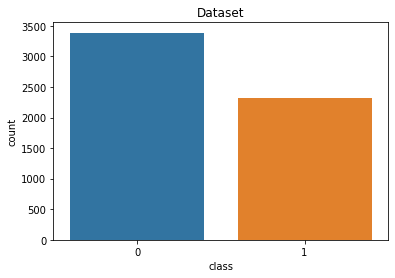

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title("Dataset")
plt.show()
plt.savefig('data_distribution_graph.pdf',dpi='figure')

# Lazy Predict

In [ ]:

!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

**FCFP+2d Descriptors**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project_Msc/Project_3/Trained_models/L_donovani_ecfp_2d_desc.csv')

In [ ]:
df

,Unnamed: 0,Smiles,class,0,1,2,3,4,5,6,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,O=C(O)COCCN1CCN(C(c2ccccc2)c2ccc(Cl)cc2)CC1,0,0,1,0,0,0,0,0,...,-0.200695,-0.212971,-0.175831,-0.064566,-0.091218,-0.206188,0.0,-0.212841,0.108629,-0.094975
1,1,CCCC[C@H]1C(=O)O[C@@H]2O[C@@]3(CC)CC[C@H]4[C@H...,0,0,0,0,0,0,0,0,...,-0.200695,-0.212971,-0.175831,-0.064566,-0.091218,-0.206188,0.0,-0.212841,-0.324445,-0.094975
2,2,C[C@@H]1CC[C@H]2[C@@H](C)C(=O)O[C@@H]3OC(C)(C)...,0,0,0,0,0,0,0,0,...,-0.200695,-0.212971,-0.175831,-0.064566,-0.091218,-0.206188,0.0,-0.212841,-0.324445,-0.094975
3,3,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,1,0,1,0,0,0,0,0,...,-0.200695,-0.212971,-0.175831,-0.064566,-0.091218,-0.206188,0.0,-0.212841,-0.324445,-0.094975
4,4,Nc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1,0,0,0,0,0,0,0,0,...,-0.200695,-0.212971,5.556260,-0.064566,-0.091218,-0.206188,0.0,-0.212841,-0.324445,-0.094975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5700,5700,Cc1cn([C@H]2C=C[C@@H](CO)O2)c(=O)[nH]c1=O,0,0,0,0,0,0,0,0,...,-0.200695,-0.212971,-0.175831,-0.064566,-0.091218,-0.206188,0.0,-0.212841,-0.324445,-0.094975
5701,5701,C[C@@H]1CC[C@H]2CC(=O)O[C@@H]3O[C@@]4(CCc5cccc...,0,0,0,0,0,0,0,0,...,-0.200695,-0.212971,-0.175831,-0.064566,-0.091218,-0.206188,0.0,-0.212841,-0.324445,-0.094975
5702,5702,c1ccc(-c2ccc(CC3CN4CCC3CC4)cc2)cc1,0,0,0,0,0,0,1,0,...,-0.200695,-0.212971,-0.175831,-0.064566,-0.091218,-0.206188,0.0,-0.212841,-0.324445,-0.094975
5703,5703,C[C@@H]1CC[C@H]2CC(=O)O[C@@H]3O[C@@]4(CCCc5ccc...,0,0,0,0,0,0,0,0,...,-0.200695,-0.212971,-0.175831,-0.064566,-0.091218,-0.206188,0.0,-0.212841,-0.324445,-0.094975


In [ ]:
X=df.drop(['Unnamed: 0','Smiles','class'],axis=1)
X

,0,1,2,3,4,5,6,7,8,9,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,1,0,0,0,0,0,0,0,0,...,-0.200695,-0.212971,-0.175831,-0.064566,-0.091218,-0.206188,0.0,-0.212841,0.108629,-0.094975
1,0,0,0,0,0,0,0,0,0,0,...,-0.200695,-0.212971,-0.175831,-0.064566,-0.091218,-0.206188,0.0,-0.212841,-0.324445,-0.094975
2,0,0,0,0,0,0,0,0,0,0,...,-0.200695,-0.212971,-0.175831,-0.064566,-0.091218,-0.206188,0.0,-0.212841,-0.324445,-0.094975
3,0,1,0,0,0,0,0,0,0,0,...,-0.200695,-0.212971,-0.175831,-0.064566,-0.091218,-0.206188,0.0,-0.212841,-0.324445,-0.094975
4,0,0,0,0,0,0,0,0,0,0,...,-0.200695,-0.212971,5.556260,-0.064566,-0.091218,-0.206188,0.0,-0.212841,-0.324445,-0.094975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5700,0,0,0,0,0,0,0,0,0,0,...,-0.200695,-0.212971,-0.175831,-0.064566,-0.091218,-0.206188,0.0,-0.212841,-0.324445,-0.094975
5701,0,0,0,0,0,0,0,0,0,0,...,-0.200695,-0.212971,-0.175831,-0.064566,-0.091218,-0.206188,0.0,-0.212841,-0.324445,-0.094975
5702,0,0,0,0,0,1,0,0,0,0,...,-0.200695,-0.212971,-0.175831,-0.064566,-0.091218,-0.206188,0.0,-0.212841,-0.324445,-0.094975
5703,0,0,0,0,0,0,0,0,0,0,...,-0.200695,-0.212971,-0.175831,-0.064566,-0.091218,-0.206188,0.0,-0.212841,-0.324445,-0.094975


In [ ]:
y=df['class']
y

0       0
1       0
2       0
3       1
4       0
       ..
5700    0
5701    0
5702    0
5703    0
5704    0
Name: class, Length: 5705, dtype: int64

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [04:34<00:00,  9.47s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.82               0.81     0.81      0.82   
ExtraTreesClassifier               0.82               0.80     0.80      0.81   
XGBClassifier                      0.80               0.79     0.79      0.80   
NuSVC                              0.81               0.79     0.79      0.80   
LGBMClassifier                     0.80               0.79     0.79      0.80   
SVC                                0.80               0.79     0.79      0.80   
KNeighborsClassifier               0.79               0.77     0.77      0.78   
BaggingClassifier                  0.78               0.77     0.77      0.78   
LogisticRegression                 0.76               0.75     0.75      0.76   
PassiveAggressiveClassifier        0.75               0.75     0.75      0.75   
SGDClassifier               

In [ ]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.82               0.81     0.81      0.82   
ExtraTreesClassifier               0.82               0.80     0.80      0.81   
XGBClassifier                      0.80               0.79     0.79      0.80   
NuSVC                              0.81               0.79     0.79      0.80   
LGBMClassifier                     0.80               0.79     0.79      0.80   
SVC                                0.80               0.79     0.79      0.80   
KNeighborsClassifier               0.79               0.77     0.77      0.78   
BaggingClassifier                  0.78               0.77     0.77      0.78   
LogisticRegression                 0.76               0.75     0.75      0.76   
PassiveAggressiveClassifier        0.75               0.75     0.75      0.75   
SGDClassifier               

Model                 Accuracy  Balanced Accuracy  ROC AUC  F1 Score 

RandomForestClassifier 0.82  0.81  0.81    0.82

ExtraTreesClassifier               0.82               0.80     0.80      0.81   
XGBClassifier                      0.80               0.79     0.79      0.80   
NuSVC                              0.81               0.79     0.79      0.80   
LGBMClassifier                     0.80               0.79     0.79      0.80   
SVC                                0.80               0.79     0.79      0.80   
KNeighborsClassifier               0.79               0.77     0.77      0.78   
BaggingClassifier                  0.78               0.77     0.77      0.78   
LogisticRegression                 0.76               0.75     0.75      0.76   
PassiveAggressiveClassifier        0.75               0.75     0.75      0.75   
SGDClassifier                      0.75               0.75     0.75      0.75   
ExtraTreeClassifier                0.75               0.75     0.75      0.75   
Perceptron                         0.74               0.74     0.74      0.74   
LinearDiscriminantAnalysis         0.73               0.73     0.73      0.73   
RidgeClassifierCV                  0.73               0.73     0.73      0.73   
RidgeClassifier                    0.73               0.73     0.73      0.73   
DecisionTreeClassifier             0.73               0.73     0.73      0.73   
LinearSVC                          0.72               0.72     0.72      0.73   
GaussianNB                         0.72               0.72     0.72      0.72   
BernoulliNB                        0.73               0.72     0.72      0.73   
AdaBoostClassifier                 0.73               0.71     0.71      0.73   
CalibratedClassifierCV             0.73               0.71     0.71      0.73   
NearestCentroid                    0.72               0.70     0.70      0.72   
QuadraticDiscriminantAnalysis      0.71               0.66     0.66      0.68   
LabelSpreading                     0.62               0.55     0.55      0.52   
LabelPropagation                   0.62               0.55     0.55      0.52   
DummyClassifier                    0.59               0.50     0.50      0.43   


**ECFP+2d descriptors**

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/Project_Msc/Project_3/Trained_models/L_donovani_fcfp_2d_desc.csv')

In [ ]:
df2

,Unnamed: 0,Smiles,class,0,1,2,3,4,5,6,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,O=C(O)COCCN1CCN(C(c2ccccc2)c2ccc(Cl)cc2)CC1,0,1,1,1,0,1,0,0,...,-0.20,-0.21,-0.18,-0.06,-0.09,-0.21,0.00,-0.21,0.11,-0.09
1,1,CCCC[C@H]1C(=O)O[C@@H]2O[C@@]3(CC)CC[C@H]4[C@H...,0,1,0,1,0,0,0,0,...,-0.20,-0.21,-0.18,-0.06,-0.09,-0.21,0.00,-0.21,-0.32,-0.09
2,2,C[C@@H]1CC[C@H]2[C@@H](C)C(=O)O[C@@H]3OC(C)(C)...,0,1,0,1,0,0,0,0,...,-0.20,-0.21,-0.18,-0.06,-0.09,-0.21,0.00,-0.21,-0.32,-0.09
3,3,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,1,1,0,0,0,1,0,1,...,-0.20,-0.21,-0.18,-0.06,-0.09,-0.21,0.00,-0.21,-0.32,-0.09
4,4,Nc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1,0,1,0,1,0,1,0,0,...,-0.20,-0.21,5.56,-0.06,-0.09,-0.21,0.00,-0.21,-0.32,-0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5700,5700,Cc1cn([C@H]2C=C[C@@H](CO)O2)c(=O)[nH]c1=O,0,1,0,1,1,1,1,1,...,-0.20,-0.21,-0.18,-0.06,-0.09,-0.21,0.00,-0.21,-0.32,-0.09
5701,5701,C[C@@H]1CC[C@H]2CC(=O)O[C@@H]3O[C@@]4(CCc5cccc...,0,1,0,1,0,1,1,0,...,-0.20,-0.21,-0.18,-0.06,-0.09,-0.21,0.00,-0.21,-0.32,-0.09
5702,5702,c1ccc(-c2ccc(CC3CN4CCC3CC4)cc2)cc1,0,1,0,0,0,1,0,0,...,-0.20,-0.21,-0.18,-0.06,-0.09,-0.21,0.00,-0.21,-0.32,-0.09
5703,5703,C[C@@H]1CC[C@H]2CC(=O)O[C@@H]3O[C@@]4(CCCc5ccc...,0,1,0,1,0,1,1,0,...,-0.20,-0.21,-0.18,-0.06,-0.09,-0.21,0.00,-0.21,-0.32,-0.09


In [ ]:
X2=df2.drop(['Unnamed: 0','Smiles','class'],axis=1)
X2

,0,1,2,3,4,5,6,7,8,9,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1,1,1,0,1,0,0,0,1,0,...,-0.20,-0.21,-0.18,-0.06,-0.09,-0.21,0.00,-0.21,0.11,-0.09
1,1,0,1,0,0,0,0,0,0,0,...,-0.20,-0.21,-0.18,-0.06,-0.09,-0.21,0.00,-0.21,-0.32,-0.09
2,1,0,1,0,0,0,0,0,0,0,...,-0.20,-0.21,-0.18,-0.06,-0.09,-0.21,0.00,-0.21,-0.32,-0.09
3,1,0,0,0,1,0,1,0,1,0,...,-0.20,-0.21,-0.18,-0.06,-0.09,-0.21,0.00,-0.21,-0.32,-0.09
4,1,0,1,0,1,0,0,0,0,0,...,-0.20,-0.21,5.56,-0.06,-0.09,-0.21,0.00,-0.21,-0.32,-0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5700,1,0,1,1,1,1,1,0,0,0,...,-0.20,-0.21,-0.18,-0.06,-0.09,-0.21,0.00,-0.21,-0.32,-0.09
5701,1,0,1,0,1,1,0,0,0,0,...,-0.20,-0.21,-0.18,-0.06,-0.09,-0.21,0.00,-0.21,-0.32,-0.09
5702,1,0,0,0,1,0,0,0,0,0,...,-0.20,-0.21,-0.18,-0.06,-0.09,-0.21,0.00,-0.21,-0.32,-0.09
5703,1,0,1,0,1,1,0,0,1,0,...,-0.20,-0.21,-0.18,-0.06,-0.09,-0.21,0.00,-0.21,-0.32,-0.09


In [ ]:
y2=df2['class']

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2,test_size=0.2,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)



100%|██████████| 29/29 [03:58<00:00,  8.22s/it]


In [ ]:
print(models)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rfc = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'n_estimators': [200,400,500],
    'max_features': [None,'sqrt', 'log2'],
    'max_depth':[None,20,30]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

CV_rfc.fit(X, y)
print(CV_rfc.best_params_)



{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 400}


In [ ]:

# Print the best hyperparameters and corresponding F1 score
print(f"Best hyperparameters: {CV_rfc.best_params_}")
print(f"Best score: {CV_rfc.best_score_:.3f}")


Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 400}
Best ROC-AUC score: 0.694


In [ ]:
CV_rfc.cv_results_


{'mean_fit_time': array([234.21898389, 448.14791465, 562.07050071,   5.55077138,
         11.27288418,  14.18937368,   2.53336754,   4.84838681,
          6.0372571 , 151.79325542, 304.80129242, 373.95534472,
          4.70663109,   9.47837505,  11.81930704,   1.89564886,
          3.33638449,   4.32383051, 185.74356937, 373.85798702,
        476.07346916,   5.77102017,  10.94769244,  13.90177574,
          2.30069308,   4.22916603,   5.46995907]),
 'std_fit_time': array([14.65544282, 11.81918315, 15.47468088,  0.63100154,  0.06181314,
         0.32451933,  0.43950446,  0.53122553,  0.6667275 ,  2.10654622,
         2.2326458 ,  2.03632821,  0.52654121,  0.56039076,  0.05990837,
         0.50508644,  0.50639811,  0.66492299,  2.7804063 ,  6.41449421,
         9.24117227,  0.63511163,  0.58407357,  0.52026842,  0.41123495,
         0.53531678,  0.60762782]),
 'mean_score_time': array([0.10954704, 0.15755434, 0.2140276 , 0.08665204, 0.15017934,
        0.18444591, 0.09713063, 0.17784791,

Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 400}

Best score: 0.694

In [ ]:

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix



# Use the best model to predict the activity labels of the test set
rf_fcfp_2d_desc_best_model = CV_rfc.best_estimator_
y_pred = rf_fcfp_2d_desc_best_model.predict(X_test)



# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

Model_Accuracy: 0.9982471516213848
f1_score: 0.9978448275862069
precison_score: 0.9978448275862069
recall_score: 0.9978448275862069
roc_auc_score: 0.9981838613558804
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       677
           1       1.00      1.00      1.00       464

    accuracy                           1.00      1141
   macro avg       1.00      1.00      1.00      1141
weighted avg       1.00      1.00      1.00      1141

confusion_matrix: [[676   1]
 [  1 463]]


In [ ]:
X

In [ ]:
y

0       0
1       0
2       0
3       1
4       0
       ..
5700    0
5701    0
5702    0
5703    0
5704    0
Name: class, Length: 5705, dtype: int64

In [ ]:

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

# initialize the random forest classifier with default hyperparameters
rfc_fcfp_2d_desc = RandomForestClassifier(n_estimators=400,n_jobs=-1)

# fit the model on the training data

# perform 5-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(rfc_fcfp_2d_desc, X_train, y_train, cv=5)

print("accuracy:",scores)
print("Mean accuracy:",scores.mean())
print("Standard deviation:", scores.std())

# fit the model on the training data
rfc_fcfp_2d_desc.fit(X_train, y_train)

# make predictions on the test data
y_pred = rfc_fcfp_2d_desc.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

accuracy: [0.81161008 0.80613363 0.79846659 0.81818182 0.80263158]
Mean accuracy: 0.807404738571511
Standard deviation: 0.006901007601837904
Model_Accuracy: 0.8019281332164768
f1_score: 0.75
precison_score: 0.8149038461538461
recall_score: 0.694672131147541
roc_auc_score: 0.7883774132001105
classification_report:               precision    recall  f1-score   support

           0       0.79      0.88      0.84       653
           1       0.81      0.69      0.75       488

    accuracy                           0.80      1141
   macro avg       0.80      0.79      0.79      1141
weighted avg       0.80      0.80      0.80      1141

confusion_matrix: [[576  77]
 [149 339]]


In [ ]:
y.value_counts()

0    3387
1    2318
Name: class, dtype: int64

**FCFP+2d_descriptors**

accuracy: [0.81161008 0.80613363 0.79846659 0.81818182 0.80263158]

Mean accuracy: 0.807404738571511

Standard deviation: 0.006901007601837904

Model_Accuracy: 0.8019281332164768

f1_score: 0.75

precison_score: 0.8149038461538461

recall_score: 0.694672131147541

roc_auc_score: 0.7883774132001105

classification_report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.84       653
           1       0.81      0.69      0.75       488

    accuracy                           0.80      1141
   macro avg       0.80      0.79      0.79      1141
weighted avg       0.80      0.80      0.80      1141

confusion_matrix: 
[[576  77]

 [149 339]]

**ECFP_2d_DESC  XGBOoost**

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Load the dataset
# data = pd.read_csv('your_dataset.csv')

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the XGBoost classifier and the parameter grid to search over
xgb = XGBClassifier(n_jobs=-1)
params = {#'max_depth': [None, 5, 8],
          'learning_rate': [0.1, 0.05,0.01, 0.001],
          'n_estimators': [400]}
          # 'subsample': [0.8, 1],
          # 'colsample_bytree': [0.8, 1]}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=xgb, param_grid=params,verbose=1, cv=5, scoring='roc_auc')

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)


Best hyperparameters:  {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 400}
Best score:  0.87316473146813


In [ ]:
grid

NameError: ignored

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

df=pd.read_csv('/content/drive/MyDrive/Project_Msc/Project_3/Trained_models/L_donovani_ecfp_2d_desc.csv')
X=df.drop(['Unnamed: 0','Smiles','class'],axis=1)
X
y=df['class']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=786)

# initialize the random forest classifier with default hyperparameters
xgb_ecfp_2d_desc = XGBClassifier(n_jobs=-1, learning_rate= 0.05, max_depth= 8, n_estimators= 400)

# fit the model on the training data

# perform 5-fold cross-validation and calculate the mean accuracy score
# scores = cross_val_score(xgb_ecfp_2d_desc, X_train, y_train, cv=5)

# print("accuracy:",scores)
# print("Mean accuracy:",scores.mean())
# print("Standard deviation:", scores.std())

# fit the model on the training data
xgb_ecfp_2d_desc.fit(X_train, y_train)

# make predictions on the test data
y_pred = xgb_ecfp_2d_desc.predict(X_test)


# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)

print("Model_Accuracy:", accuracy)
print("f1_score:", f1_score)
print("precison_score:", precision_score)
print("recall_score:", recall_score)
print("roc_auc_score:", roc_auc_score)
print("classification_report:", classification_report)
print("confusion_matrix:", confusion_matrix)

In [ ]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,0,1,0,0,0,0,0,0,0,...,-0.199613,-0.213244,-0.176054,-0.064646,-0.091331,-0.205431,0.0,-0.213114,0.108356,-0.095092
1,1,0,0,0,0,0,0,0,0,0,...,-0.199613,-0.213244,-0.176054,-0.064646,-0.091331,-0.205431,0.0,-0.213114,-0.324384,-0.095092
2,2,0,0,0,0,0,0,0,0,0,...,-0.199613,-0.213244,-0.176054,-0.064646,-0.091331,-0.205431,0.0,-0.213114,-0.324384,-0.095092
3,3,0,1,0,0,0,0,0,0,0,...,-0.199613,-0.213244,-0.176054,-0.064646,-0.091331,-0.205431,0.0,-0.213114,-0.324384,-0.095092
4,4,0,0,0,0,0,0,0,0,0,...,-0.199613,-0.213244,5.549217,-0.064646,-0.091331,-0.205431,0.0,-0.213114,-0.324384,-0.095092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5686,5686,0,0,0,0,0,0,0,0,0,...,-0.199613,-0.213244,-0.176054,-0.064646,-0.091331,-0.205431,0.0,-0.213114,-0.324384,-0.095092
5687,5687,0,0,0,0,0,0,0,0,0,...,-0.199613,-0.213244,-0.176054,-0.064646,-0.091331,-0.205431,0.0,-0.213114,-0.324384,-0.095092
5688,5688,0,0,0,0,0,1,0,0,0,...,-0.199613,-0.213244,-0.176054,-0.064646,-0.091331,-0.205431,0.0,-0.213114,-0.324384,-0.095092
5689,5689,0,0,0,0,0,0,0,0,0,...,-0.199613,-0.213244,-0.176054,-0.064646,-0.091331,-0.205431,0.0,-0.213114,-0.324384,-0.095092


Model_Accuracy: 0.8220858895705522

f1_score: 0.7781420765027323

precison_score: 0.796420581655481

recall_score: 0.7606837606837606

roc_auc_score: 0.812734153744555

classification_report: 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       673
           1       0.80      0.76      0.78       468

    accuracy                           0.82      1141
   macro avg       0.82      0.81      0.81      1141
weighted avg       0.82      0.82      0.82      1141

confusion_matrix:
 [[582  91]
 
 [112 356]]

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Project_Msc/Project_3/L_donovani_2class_bioactivityData.csv')

In [ ]:
df['Smiles'].unique()

array(['O=C(O)COCCN1CCN(C(c2ccccc2)c2ccc(Cl)cc2)CC1',
       'CCCC[C@H]1C(=O)O[C@@H]2O[C@@]3(CC)CC[C@H]4[C@H](C)CC[C@@H]1[C@@]24OO3',
       'C[C@@H]1CC[C@H]2[C@@H](C)C(=O)O[C@@H]3OC(C)(C)OO[C@@]32[C@H]1C',
       ..., 'c1ccc(-c2ccc(CC3CN4CCC3CC4)cc2)cc1',
       'C[C@@H]1CC[C@H]2CC(=O)O[C@@H]3O[C@@]4(CCCc5ccc(Cl)cc5)CC[C@@H]1[C@@]23OO4',
       'CCCC[C@@]12CC[C@H]3[C@H](C)CC[C@H]4CC(=O)O[C@H](O1)[C@]43OO2'],
      dtype=object)

In [ ]:
df.groupby(by=['Smiles']).mean()

In [ ]:

df.drop_duplicates(subset=['Smiles'],inplace=True)

In [ ]:
df.to_csv('/content/drive/MyDrive/Project_Msc/Project_3/L_donovani_2class_bioactivityData.csv')